# Principle Component Analysis

## After running all simulations
### PCA
1) Run PCA with an initally high number of components - 10-20
2) Visualise the results
3) Look at cumulative explained variance - see how many components explain 99% of the variance
4) Reduce the dataset to the number of components that explain 99% of the variance



### Cross Validation
5) Run K Fold with the reduced number of Principle Components
6) Look at variance, see if explained variance matches between folds (can take one as reference - and do relative % error)

### Retraining PCA
7) Retrain the model on all the data with the new set of components
8) Visualise the results
9) Save scaler and PCA to a file

Start by importing the necessary modules


In [45]:
%load_ext autoreload 
%autoreload 2

import joblib
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sklearn
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold
import os
import circ_utils

!pwd

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
/Users/aalexander-ikwue/Documents/GitHub/SensitivityAnalysis/Tutorials


In [46]:
n_runs = 50
input_directory = f"../Tutorials/data/pressure_traces_{n_runs}"
input_directory

'../Tutorials/data/pressure_traces_50'

In [47]:
cardiac_data_df = circ_utils.simulation_loader(input_directory=input_directory)
cardiac_data_df.head()

,0,1,2,3,4,5,6,7,8,9,...,92,93,94,95,96,97,98,99,C0 (mm^3/s),dt
Index,,,,,,,,,,,,,,,,,,,,,
0,85.291980,97.308678,112.469789,125.980893,137.381569,146.512487,153.379665,158.109207,160.873161,161.907651,...,87.365368,86.343548,85.783257,85.682955,85.582815,85.482833,85.383004,85.301257,3.806833,5.555556
1,158.187442,171.127517,193.222536,212.617624,228.153150,240.071999,248.690124,254.391381,257.614092,258.735794,...,160.753485,160.453160,160.153645,159.854912,159.089323,158.778207,158.482459,158.250462,9.236183,4.676768
2,105.360452,114.949648,131.731944,147.835999,162.064751,174.121717,183.912977,191.530776,197.097542,200.788415,...,106.370553,106.034629,107.005681,106.671492,106.339966,106.011017,105.684548,105.418195,6.383838,5.595960
3,118.200073,142.711742,174.115599,203.410304,229.238511,250.706147,267.367575,279.157877,286.300027,289.208816,...,121.735232,121.570142,121.405318,118.841638,118.680872,118.520358,118.360092,118.218042,5.539957,8.898990
4,39.788025,40.352828,40.251152,40.149918,40.049118,40.506549,46.411676,52.826377,58.934371,64.427921,...,40.495596,40.393190,40.291229,40.189705,40.088626,39.987989,39.887785,39.797377,2.295997,10.646465


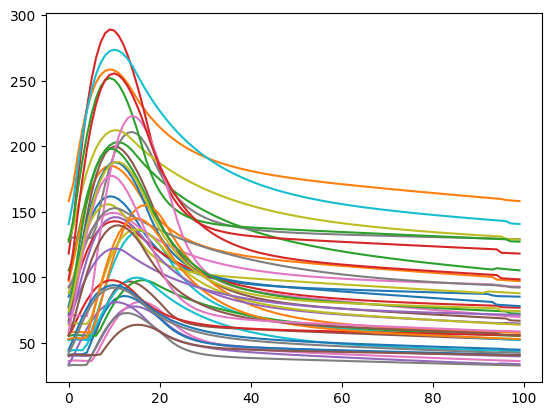

In [48]:
for _, row in cardiac_data_df.iterrows():
    plt.plot(row.values[:100])

plt.show()

Created principle components - describe the PCA process in more detail here

In [49]:
# Copy the data and separate the target variable
X = cardiac_data_df.copy()
# y = X.pop("C0 (mm^3/s)")
X = X.iloc[:, 0:102]

# Create an instance of StandardScaler
scaler = StandardScaler()
# Fit the scaler to the data and transform it - standardize
X_scaled = scaler.fit_transform(X)

pca = PCA(n_components=10)
X_pca = pca.fit_transform(X_scaled)

# Convert to dataframe
component_names = [f"PC{i+1}" for i in range(X_pca.shape[1])]
X_pca = pd.DataFrame(X_pca, columns=component_names, index=cardiac_data_df.index)

X_pca.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
Index,,,,,,,,,,
0,2.224816,-0.960286,0.851115,-0.914949,-0.197831,-0.383470,0.105341,0.099834,-0.057959,-0.030391
1,24.550788,-2.216077,-0.067762,0.024004,-0.094767,1.173802,0.159273,0.103802,-0.023207,0.005257
2,11.021683,-0.294728,-1.140027,-0.124547,0.965361,0.406119,-0.346632,-0.044238,0.091294,0.063200
3,14.085171,2.546439,2.131623,-0.376554,-0.756052,-0.664862,-0.093514,0.010082,0.061201,-0.018646
4,-11.614805,-0.793604,0.273302,0.670076,-0.266422,0.383085,0.057854,0.019323,0.011436,0.000556


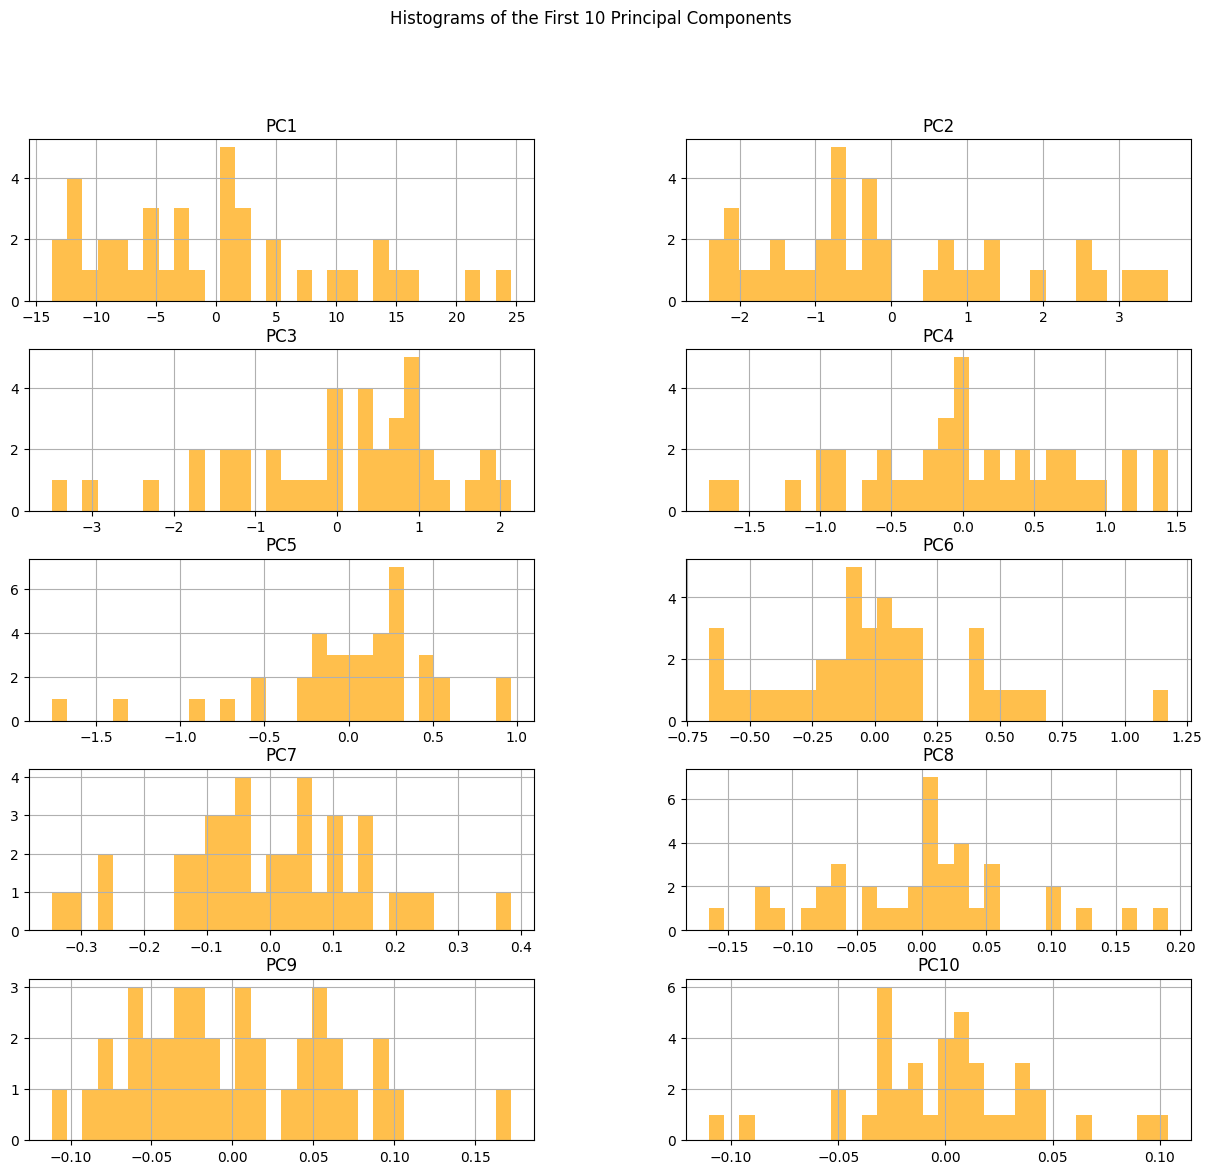

In [50]:
# Plot Histograms
X_pca.hist(bins=30, figsize=(15, 13), layout=(5, 2), alpha=0.7, color='orange')
plt.suptitle('Histograms of the First 10 Principal Components')
plt.show()

Plotted the explained and cumulative variance - using function from circ_utils

/Users/aalexander-ikwue/Documents/GitHub/SensitivityAnalysis/Tutorials/circ_utils.py:180: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  axs[0].set(


array([<Axes: title={'center': '% Explained Variance'}, xlabel='Component'>,
       <Axes: title={'center': '% Cumulative Variance'}, xlabel='Component'>],
      dtype=object)

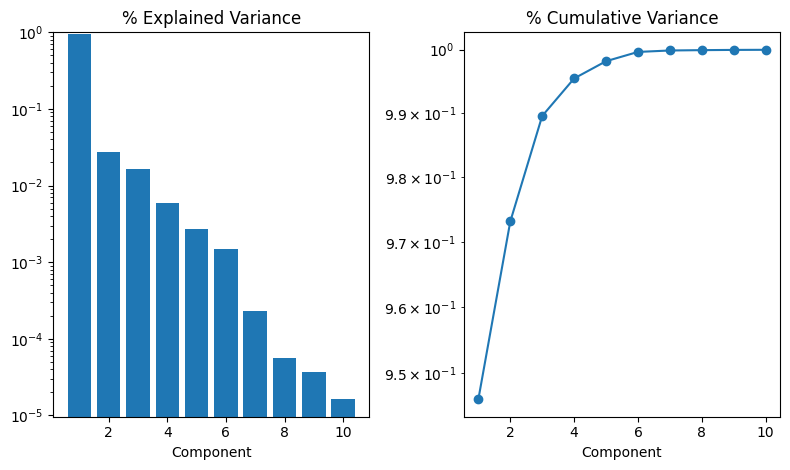

In [51]:
circ_utils.plot_variance(pca)

Explain what these results represent - * Plotting PCA components on separate graphs


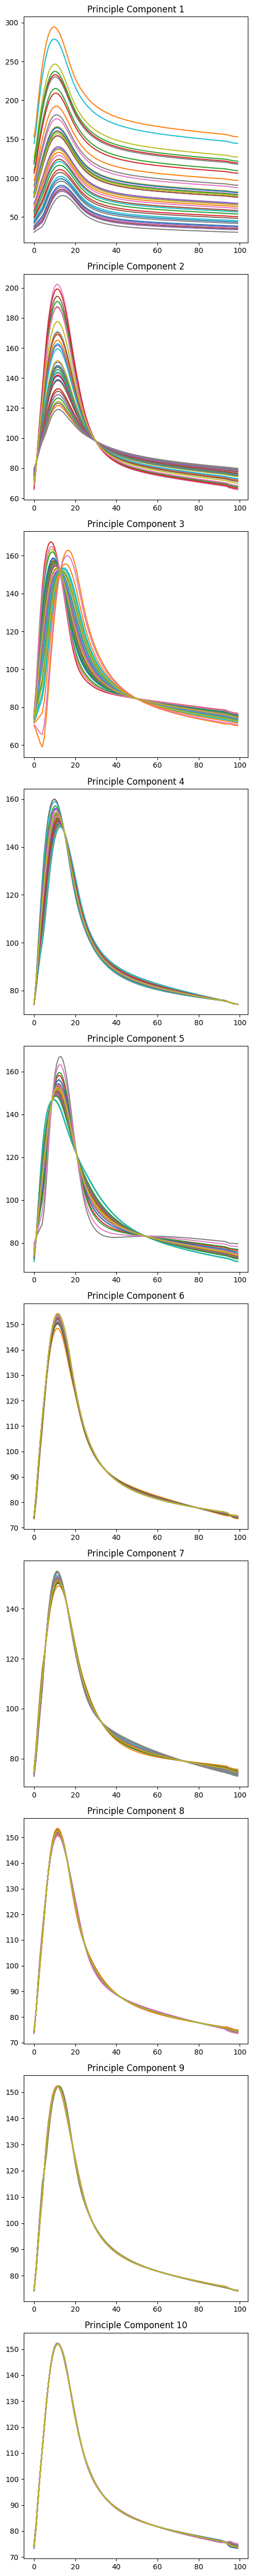

In [52]:
fig, ax = plt.subplots(nrows=pca.n_components_, figsize=(5, 5*pca.n_components_))
for i in range(pca.n_components_):
    for row in circ_utils.get_component(X_scaled, pca.components_, i, scaler):
        ax[i].plot(row[:100])
        ax[i].set_title('Principle Component '+ str(i+1))

fig.tight_layout()
plt.show()

* Initialised k-fold cross-validation
* Created a placeholder for storing results

In [53]:
kf = KFold(n_splits=5, random_state=1, shuffle=True)

explained_variance_ratios = []
pca_components = []

kf

KFold(n_splits=5, random_state=1, shuffle=True)

* Split the data into training and test sets
* Apply PCA on each training set
* Calculate the mean and standard deviation of the explained variance ratios across folds to calculate the percentage error
* Percentage error = (standard deviation / mean * 100)
* Checked that explained variance ratios matched across folds

In [54]:
for train_index, test_index in kf.split(X_scaled):
    X_train, _ = X_scaled[train_index], X_scaled[test_index]
    
    pca = PCA(n_components=4)
    X_train_pca = pca.fit_transform(X_train)

    # Store the PCA components
    pca_components.append(pca.components_)
    # Store the explained variance ratio of this fold
    explained_variance_ratios.append(pca.explained_variance_ratio_)


explained_variance_ratios = np.array(explained_variance_ratios)

mean_explained_variance_ratio = np.mean(explained_variance_ratios, axis=0)
std_explained_variance_ratio = np.std(explained_variance_ratios, axis=0)

percentage_error = (std_explained_variance_ratio / mean_explained_variance_ratio) * 100
print(f'percentage error: \n{percentage_error}')
print(f'explained variance ratios: \n{explained_variance_ratios}')


percentage error: 
[ 0.62385285  6.95881163 22.47052132 13.12123268]
explained variance ratios: 
[[0.95746705 0.02449335 0.0094539  0.00530287]
 [0.94090899 0.03017442 0.01846472 0.00551247]
 [0.94498158 0.02613214 0.01817446 0.00582029]
 [0.9419833  0.02708382 0.02022171 0.00705294]
 [0.94679835 0.02632985 0.01721837 0.00482698]]


Redo PCA with fewer components

In [55]:
pca_reduce = PCA(n_components=4)
pca_reduced = pca_reduce.fit_transform(X_scaled)

component_names = [f"PC{i+1}" for i in range(pca_reduced.shape[1])]
pca_reduced = pd.DataFrame(pca_reduced, columns=component_names, index=cardiac_data_df.index)

* Save the scaler and PCA to a file

In [56]:
os.system(f'mkdir -p ../Tutorials/data/output_pca_{n_runs}')
joblib.dump(scaler, f'../Tutorials/data/output_pca_{n_runs}/scaler.pkl')
joblib.dump(pca_reduced, f'../Tutorials/data/output_pca_{n_runs}/pca.pkl')

['../Tutorials/data/output_pca_50/pca.pkl']